In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from PIL import Image


In [2]:
%pwd

'f:\\4.Summer_23\\2.CPV301\\LAB\\lab3'

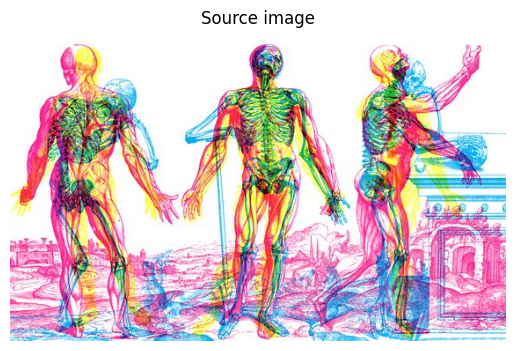

In [13]:
img = cv2.cvtColor(cv2.imread('rgb1.jpg'), cv2.COLOR_BGR2RGB)
plt.axis('off' )
plt.title('Source image')
plt.imshow(img)
plt.show()

In [14]:
img = cv2.cvtColor(cv2.imread('rgb1.jpg'), cv2.COLOR_BGR2RGB)
ri, gi, bi = cv2.split(img.astype(np.int16))

img_new = np.zeros(img.shape, dtype=img.dtype)
@interact(r=(0, 255), g=(0, 255), b=(0, 255))
def g(r=0 , g=0 , b=0):
    print('red:{},green:{},blue:{}'.format(r,g,b))
    img_new[:, :, 0] = ri/255*r
    img_new[:, :, 1] = gi/255*g
    img_new[:, :, 2] = bi/255*b
    plt.figure(figsize=(5,5))
    plt.axis('off' )
    plt.imshow(img_new)

interactive(children=(IntSlider(value=0, description='r', max=255), IntSlider(value=0, description='g', max=25…

In [15]:
rr, gg, bb = cv2.split(img.astype(np.int16))

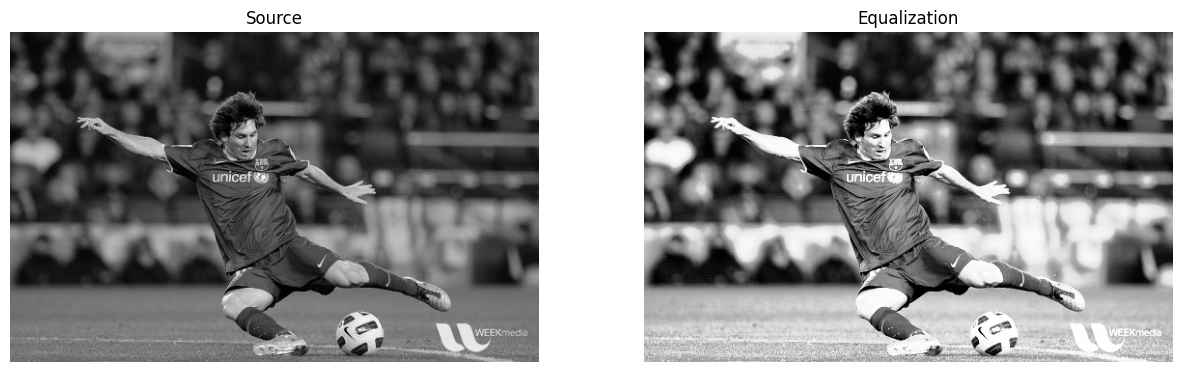

In [16]:
img = cv2.imread('messi5.jpg', cv2.IMREAD_GRAYSCALE)
equa_img = cv2.equalizeHist(img)
plt.figure(figsize=(15,5))
plt.subplot(121), plt.title('Source'), plt.axis('off' )
plt.imshow(img, cmap='gray')
plt.subplot(122),plt.title('Equalization'),plt.axis('off' )
plt.imshow(equa_img,cmap='gray')
plt.show()

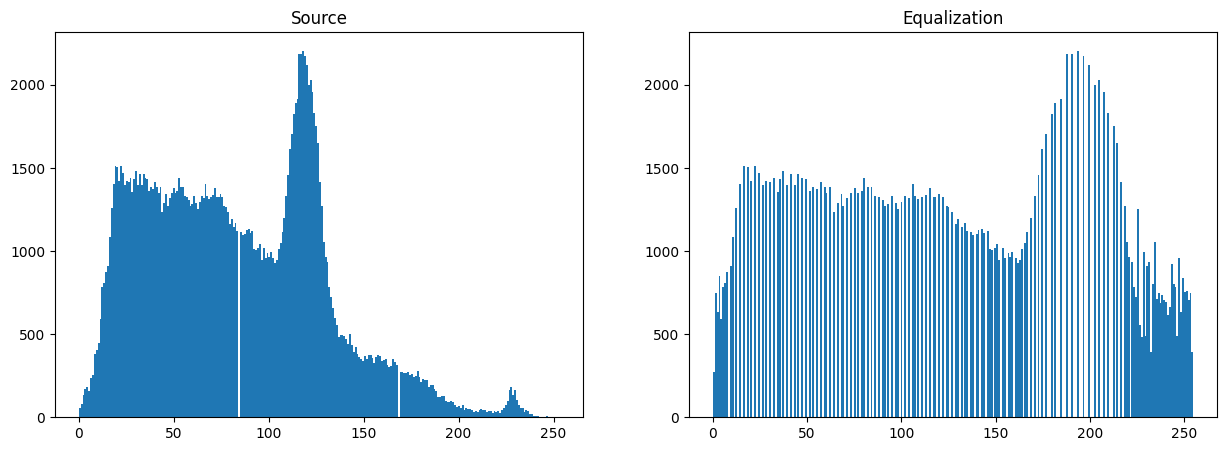

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.title('Source')
plt.hist(img.ravel(),bins=256)
plt.subplot(122), plt.title('Equalization')
plt.hist(equa_img.ravel(),bins=256)
plt.show()

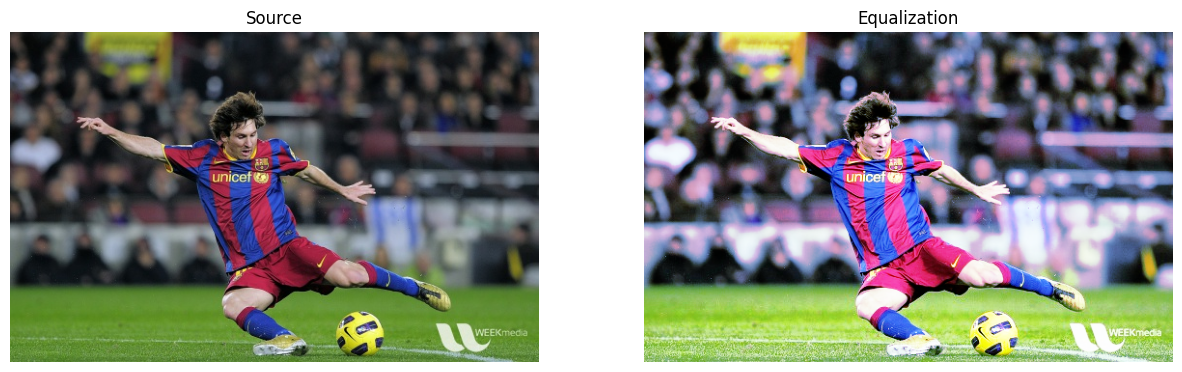

In [19]:
img = cv2.imread('messi5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
equa_img_r = cv2.equalizeHist(img[:,:,0])
equa_img_g = cv2.equalizeHist(img[:,:,1])
equa_img_b = cv2.equalizeHist(img[:,:,2])
equa_img = cv2.merge([equa_img_r, equa_img_g, equa_img_b])
plt.figure(figsize=(15,10))
plt.subplot(121), plt.title('Source'), plt.axis('off' )
plt.imshow(img)
plt.subplot(122), plt.title('Equalization'), plt.axis('off' )
plt.imshow(equa_img)
plt.show()

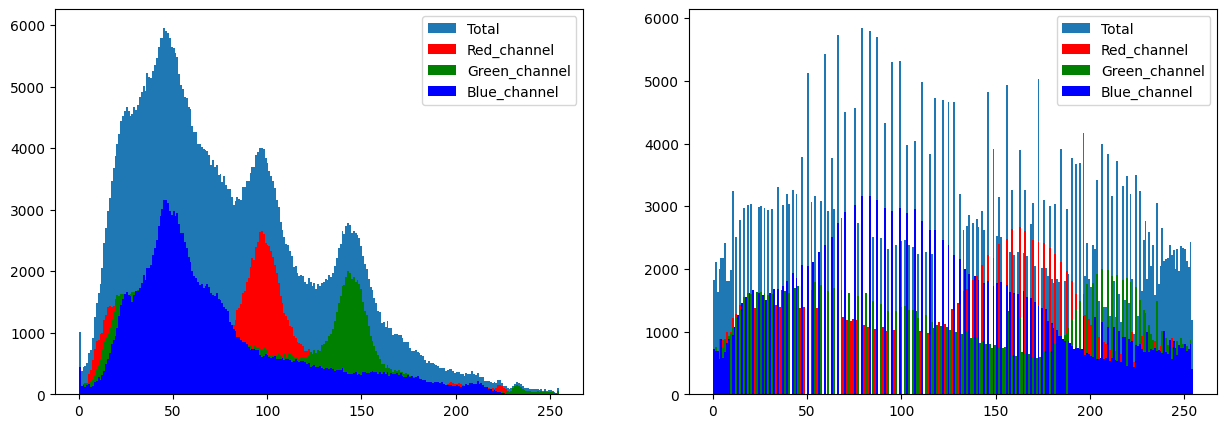

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(img.ravel(),bins=256)
plt.hist(img[:,:,0].ravel(),bins=256,color='Red'  ,alpha=1)
plt.hist(img[:,:,1].ravel(),bins=256,color='Green',alpha=1)
plt.hist(img[:,:,2].ravel(),bins=256,color='Blue' ,alpha=1)
plt.legend(['Total', 'Red_channel', 'Green_channel', 'Blue_channel'])
plt.subplot(122)
plt.hist(equa_img.ravel(),bins=256)
plt.hist(equa_img[:,:,0].ravel(),bins=256,color='Red'  ,alpha=1)
plt.hist(equa_img[:,:,1].ravel(),bins=256,color='Green',alpha=1)
plt.hist(equa_img[:,:,2].ravel(),bins=256,color='Blue' ,alpha=1)
plt.legend(['Total', 'Red_channel', 'Green_channel', 'Blue_channel'])
plt.show()

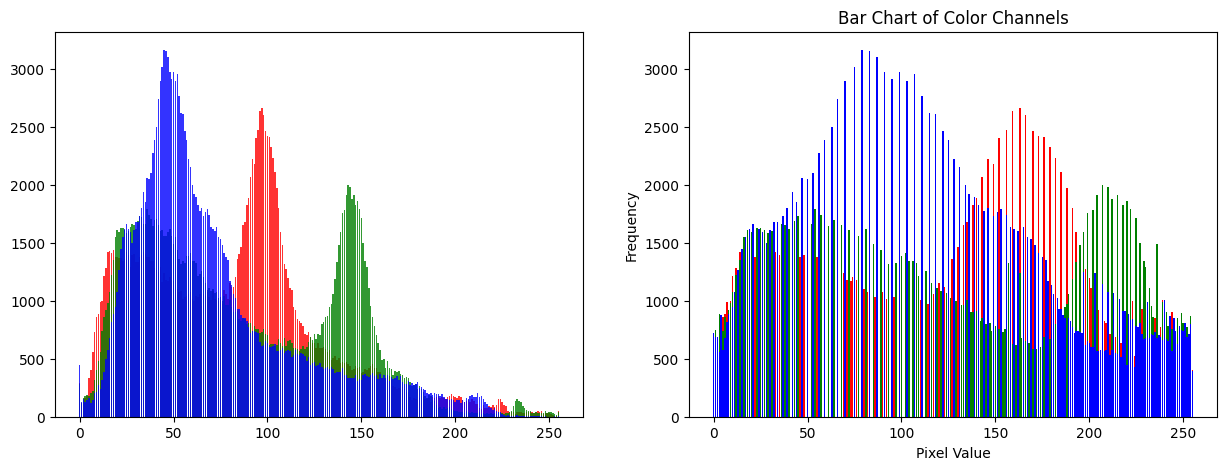

In [21]:
img = cv2.imread('messi5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
channel =[img[:,:,0],img[:,:,1],img[:,:,2]]
channel_1 =[equa_img[:,:,0],equa_img[:,:,1],equa_img[:,:,2]]
colors= ['red', 'green', 'blue']
plt.figure(figsize=(15, 5))
# subplot 1
plt.subplot(121)
for channel, color in zip(channel, colors):
    unique_colors, counts = np.unique(channel, return_counts=True)
    plt.bar(unique_colors, counts, color=color, alpha=0.8)

# subplot 2
plt.subplot(122)
for channel, color in zip(channel_1, colors):
    unique_colors, counts = np.unique(channel, return_counts=True)
    plt.bar(unique_colors, counts, color=color, alpha=1)

# Đặt tên và hiển thị biểu đồ
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Bar Chart of Color Channels')

plt.show()


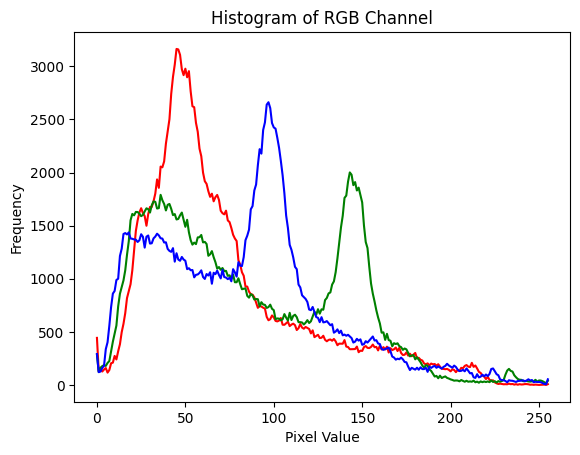

In [24]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('messi5.jpg')

# Trích xuất kênh màu R
channel_r = img[:,:,0]
channel_g = img[:,:,1]
channel_b = img[:,:,2]
# Tính histogram
hist_r = cv2.calcHist([channel_r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([channel_g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([channel_b], [0], None, [256], [0, 256])

# Vẽ biểu đồ histogram
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of RGB Channel')
plt.show()

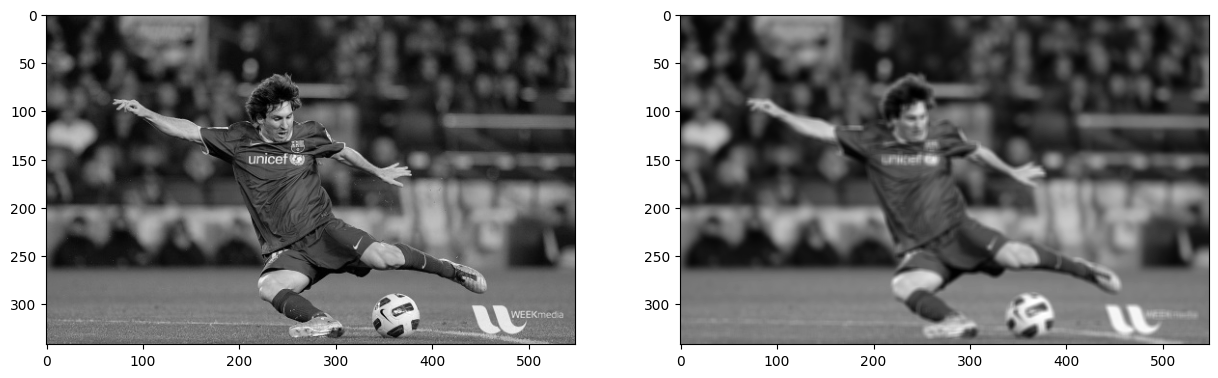

(342, 548)

In [33]:
img = cv2.imread('messi5.jpg',cv2.IMREAD_GRAYSCALE)
# img =   img[:,:,::1]
blur_img = cv2.blur(img, (5,5))
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(blur_img,cmap='gray')
plt.show()
blur_img.shape

In [34]:
def salt_peper_noise(pepper, img):
    x , y =img.shape
    salt = 1-pepper
    g = np.zeros((x,y),dtype=np.float32)
    for i in range(x):
        for j in range(y):
            rdn = np.random.random()
            if rdn < pepper:
                g[i][j] = 1
            elif rdn > salt: 
                g[i][j] = 0
            else:
                g[i][j] = img[i][j]
    return g 


In [36]:
img = cv2.imread('messi5.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (500,500))

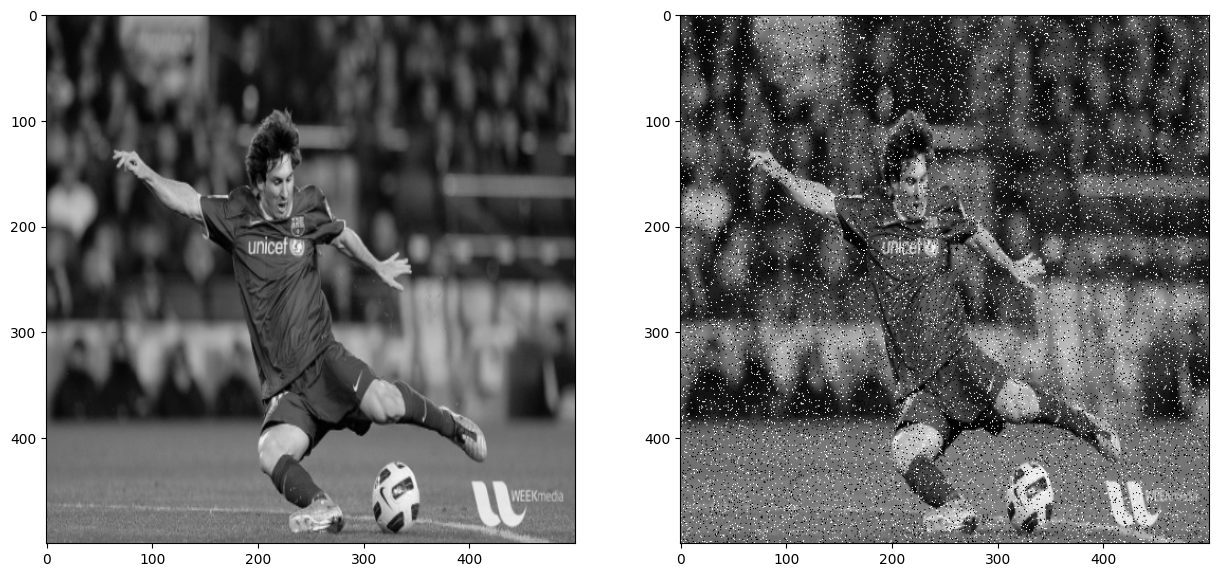

In [37]:

img = img/255
salt_img = salt_peper_noise(0.05, img)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(salt_img,cmap='gray')
plt.show()

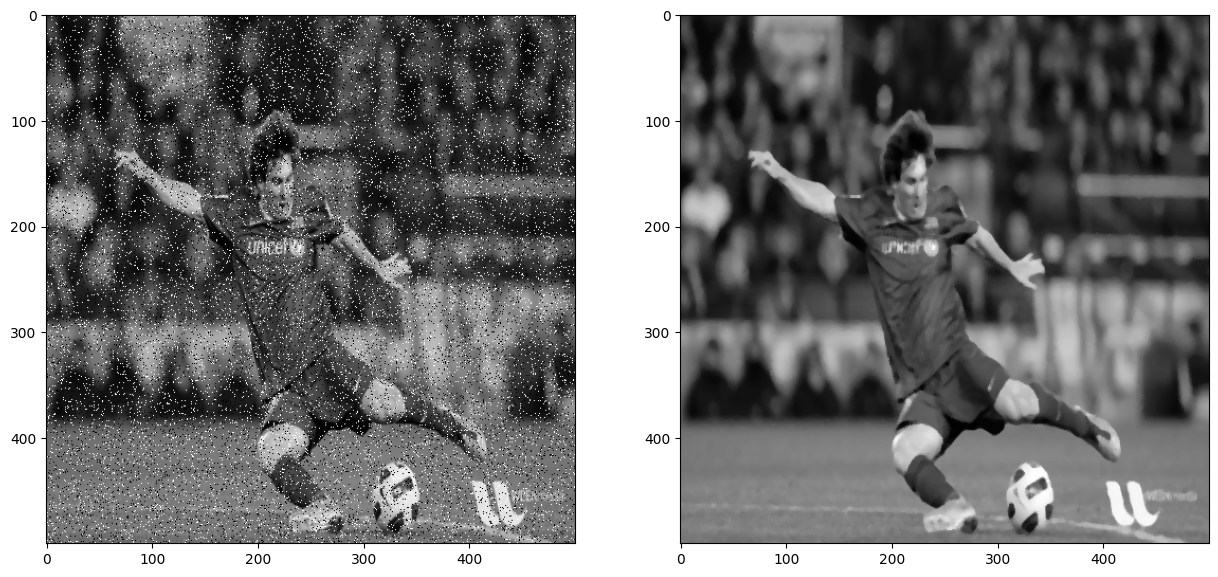

In [38]:
## MEDIAN
median_filetr = cv2.medianBlur(salt_img , 5)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(salt_img, cmap='gray')
plt.subplot(122)
plt.imshow(median_filetr,cmap='gray')
plt.show()

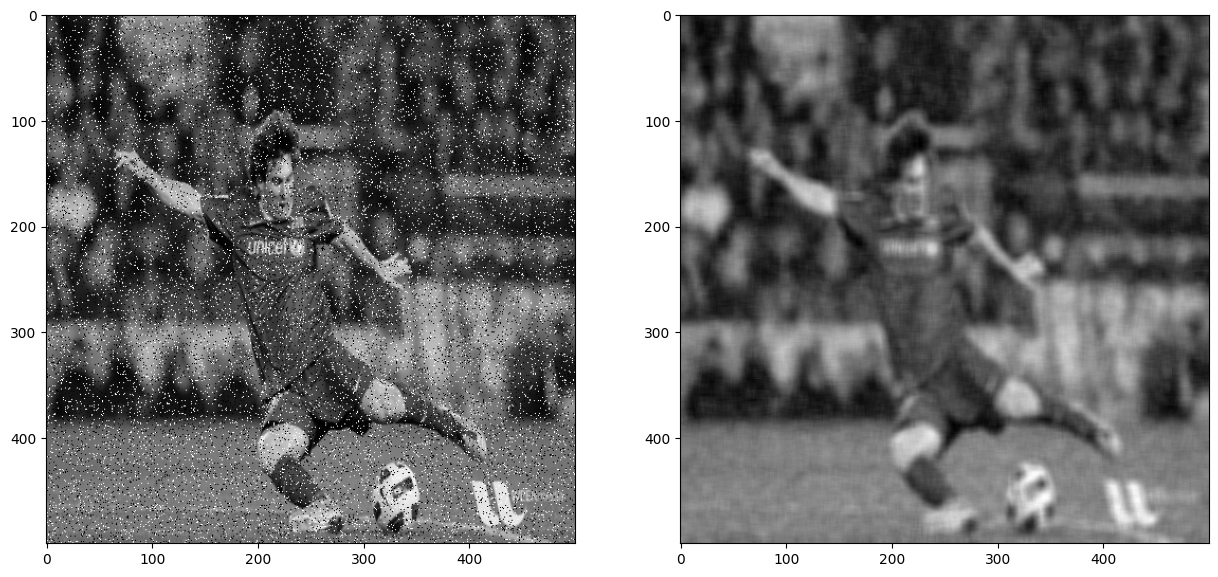

In [39]:
## MEAN
mean_filetr = cv2.blur(salt_img,(9,9))
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(salt_img, cmap='gray')
plt.subplot(122)
plt.imshow(mean_filetr,cmap='gray')
plt.show()

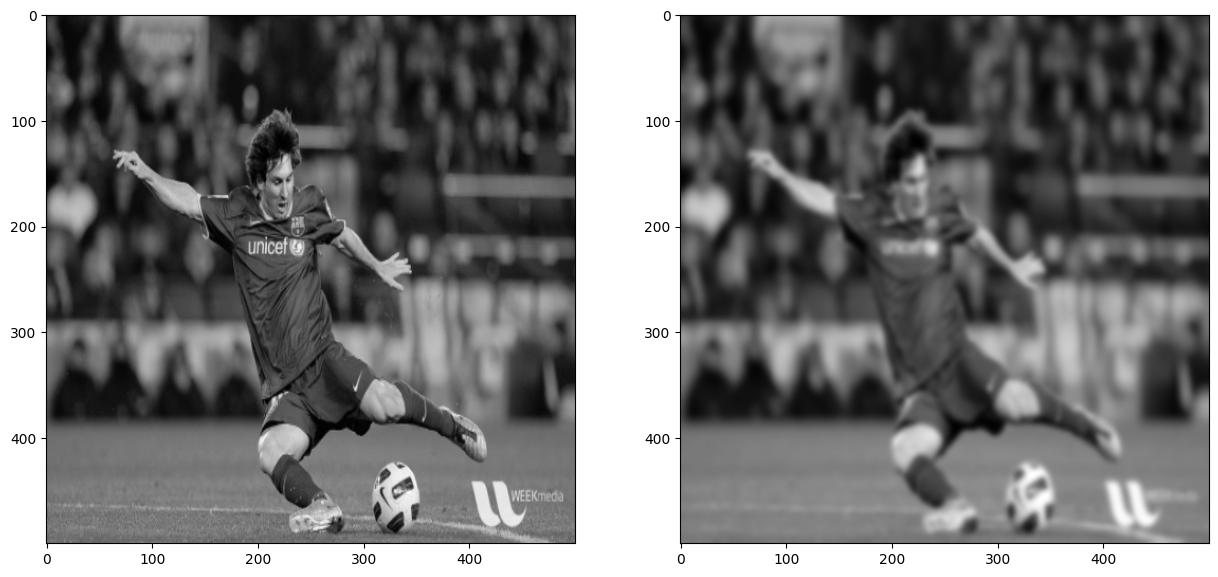

In [40]:
## GAUs
gaus_img = cv2.GaussianBlur(img,(15,15),0)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(gaus_img,cmap='gray')
plt.show()